In [1]:
import pandas as pd
import numpy as np
from datetime import date
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier

%matplotlib inline

# Data Info.

In [2]:
df = pd.read_csv('C:/1. Yonsei/DSL/hw/train.csv')
df.head()

,Unnamed: 0,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,0,F,2016-06-07T11:31:19Z,2016-06-07T00:00:00Z,34.0,ILHA DO PRÍNCIPE,0.0,0.0,0.0,0.0,0.0,0.0,No
1,1,M,2016-05-12T17:36:32Z,2016-05-12T00:00:00Z,14.0,ILHA DO PRÍNCIPE,0.0,0.0,0.0,0.0,0.0,0.0,Yes
2,2,M,2016-05-30T09:01:57Z,2016-05-30T00:00:00Z,7.0,ILHA DO PRÍNCIPE,1.0,0.0,0.0,0.0,0.0,0.0,No
3,3,F,2016-05-24T11:57:40Z,2016-05-30T00:00:00Z,54.0,JESUS DE NAZARETH,1.0,1.0,1.0,0.0,1.0,1.0,Yes
4,4,F,2016-04-12T13:48:32Z,2016-05-02T00:00:00Z,6.0,MARIA ORTIZ,0.0,0.0,0.0,0.0,0.0,1.0,No


In [3]:
print(df.shape)

(100527, 13)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100527 entries, 0 to 100526
Data columns (total 13 columns):
Unnamed: 0        100527 non-null int64
Gender            99713 non-null object
ScheduledDay      99675 non-null object
AppointmentDay    99718 non-null object
Age               99704 non-null float64
Neighbourhood     99714 non-null object
Scholarship       99718 non-null float64
Hipertension      99682 non-null float64
Diabetes          99742 non-null float64
Alcoholism        99722 non-null float64
Handcap           99682 non-null float64
SMS_received      99716 non-null float64
No-show           100527 non-null object
dtypes: float64(7), int64(1), object(5)
memory usage: 10.0+ MB


In [5]:
print('Gender:',df.Gender.unique())
print('Scheduled_Day:',df.ScheduledDay.unique())
print('Appointment_Day:',df.AppointmentDay.unique())
print('Age:',sorted(df.Age.unique()))
print('Neighborhood:',df.Neighbourhood.unique())
print('Scholarship:',df.Scholarship.unique())
print('Hypertension:',df.Hipertension.unique())
print('Diabetes:',df.Diabetes.unique())
print('Alcoholism:',df.Alcoholism.unique())
print('Handicap:',df.Handcap.unique())
print('SMS_received:',df.SMS_received.unique())

Gender: ['F' 'M' nan]
Scheduled_Day: ['2016-06-07T11:31:19Z' '2016-05-12T17:36:32Z' '2016-05-30T09:01:57Z' ...
 '2016-06-07T11:19:57Z' '2016-04-01T16:50:15Z' '2016-05-04T10:24:25Z']
Appointment_Day: ['2016-06-07T00:00:00Z' '2016-05-12T00:00:00Z' '2016-05-30T00:00:00Z'
 '2016-05-02T00:00:00Z' '2016-05-17T00:00:00Z' '2016-06-03T00:00:00Z'
 '2016-06-02T00:00:00Z' '2016-05-11T00:00:00Z' '2016-06-08T00:00:00Z'
 '2016-05-05T00:00:00Z' '2016-06-01T00:00:00Z' '2016-06-06T00:00:00Z'
 '2016-05-04T00:00:00Z' '2016-05-06T00:00:00Z' '2016-05-20T00:00:00Z'
 '2016-05-09T00:00:00Z' '2016-05-19T00:00:00Z' '2016-04-29T00:00:00Z'
 '2016-05-31T00:00:00Z' '2016-05-03T00:00:00Z' '2016-05-24T00:00:00Z'
 '2016-05-10T00:00:00Z' '2016-05-25T00:00:00Z' '2016-05-18T00:00:00Z'
 '2016-05-16T00:00:00Z' nan '2016-05-13T00:00:00Z' '2016-05-14T00:00:00Z']
Age: [-1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27

# Data cleaning

In [6]:
# renaming column names
df.rename(columns=lambda x: x.lower(), inplace=True)
df.rename(columns={'scheduledday':'scheduled_day','neighbourhood':'neighborhood','appointmentday':'appointment_day',
                   'hipertension':'hypertension','handcap':'handicap','no-show':'no_show'}, inplace=True)

# dropping data which contains missing value.
df2 = df.dropna()

# cleaning data: age
df2 = df2[df2.age>=0]

# changing the form of time data: scheduled_day, appointment_day
df2['scheduled_day'] = pd.to_datetime(df2['scheduled_day'])
df2['appointment_day'] = pd.to_datetime(df2['appointment_day'])

# Mapping the gender to numeric categorical values.
# Mapping 'no-show' to numeric categorical values.
df2['gender'] = df2['gender'].map({'F': 0, 'M': 1})
df2['no_show'] = df2['no_show'].map({'No': 1, 'Yes': 0})

# Encoding the neighborhood column into numeric values
encoder_neighborhood = LabelEncoder()
df2['neighborhood_enc'] = encoder_neighborhood.fit_transform(df2['neighborhood'])

# Making new variables - until_show, appointment_weekday, scheduled_weekday
df2['until_show'] = df2['appointment_day'] - df2['scheduled_day']
df2['until_show'] = df2['until_show'].astype('timedelta64[D]')
df2['until_show'] = np.where(df2['until_show'] < 0, 0, df2['until_show'])

df2['appointment_weekday'] = df2['appointment_day'].dt.weekday_name
df2['scheduled_weekday'] = df2['scheduled_day'].dt.weekday_name

# Mapping 'appointment_weekday' to numeric categorical values.
# Mapping 'scheduled_weekday' to numeric categorical values.
df2['appointment_weekday'] = df2['appointment_weekday'].map({'Monday':0,'Tuesday':1,'Wednesday':2,'Thursday':3,'Friday':4,'Saturday':5})
df2['scheduled_weekday'] = df2['scheduled_weekday'].map({'Monday':0,'Tuesday':1,'Wednesday':2,'Thursday':3,'Friday':4,'Saturday':5 })

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91876 entries, 0 to 100526
Data columns (total 17 columns):
unnamed: 0             91876 non-null int64
gender                 91876 non-null int64
scheduled_day          91876 non-null datetime64[ns]
appointment_day        91876 non-null datetime64[ns]
age                    91876 non-null float64
neighborhood           91876 non-null object
scholarship            91876 non-null float64
hypertension           91876 non-null float64
diabetes               91876 non-null float64
alcoholism             91876 non-null float64
handicap               91876 non-null float64
sms_received           91876 non-null float64
no_show                91876 non-null int64
neighborhood_enc       91876 non-null int64
until_show             91876 non-null float64
appointment_weekday    91876 non-null int64
scheduled_weekday      91876 non-null int64
dtypes: datetime64[ns](2), float64(8), int64(6), object(1)
memory usage: 12.6+ MB


In [7]:
# dropping unwanted cloumns: unnamed, scheduled_day, appointment_day, neighborhood
# Making new dataframe
df3 = df2[['gender', 'age', 'neighborhood_enc', 'scholarship', 'hypertension','diabetes', 'alcoholism', 'handicap', 
           'sms_received','until_show','appointment_weekday','scheduled_weekday','no_show']]

df3.head()

,gender,age,neighborhood_enc,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,until_show,appointment_weekday,scheduled_weekday,no_show
0,0,34.0,33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1
1,1,14.0,33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3,0
2,1,7.0,33,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
3,0,54.0,40,1.0,1.0,1.0,0.0,1.0,1.0,5.0,0,1,0
4,0,6.0,43,0.0,0.0,0.0,0.0,0.0,1.0,19.0,0,1,1


# EDA

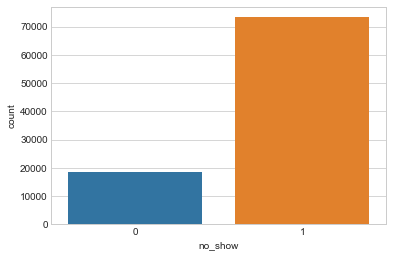

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='no_show', data=df3) # no_show:0_YES, 1_NO

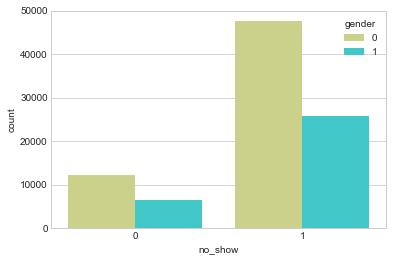

In [9]:
sns.countplot(x='no_show', hue='gender', data=df3, palette='rainbow_r')
# no_show : 0_YES, 1_NO
# gender : 0_Female, 1_Male

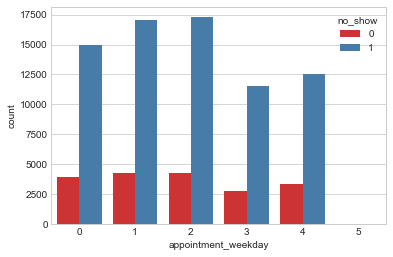

In [10]:
sns.countplot(x='appointment_weekday', data=df3, hue='no_show', palette='Set1')
# no_show : 0_YES, 1_NO
# appointment_weekday : 0_Mon, 1_Tue, 2_Wed, 3_Thr, 4_Fri, 5_Sat

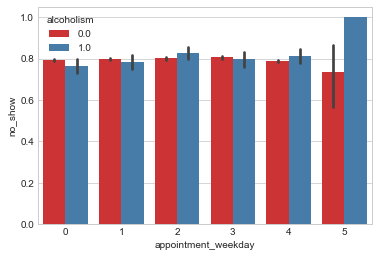

In [11]:
sns.barplot(x='appointment_weekday', y='no_show', hue='alcoholism', data=df3, palette='Set1')
# no_show : 0_YES, 1_NO
# appointment_weekday : 0_Mon, 1_Tue, 2_Wed, 3_Thr, 4_Fri, 5_Sat

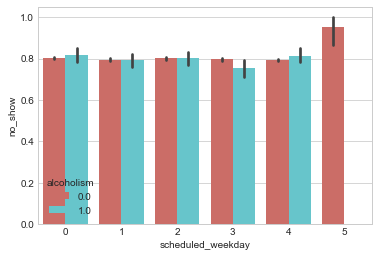

In [12]:
sns.barplot(x='scheduled_weekday', y='no_show', hue='alcoholism', data=df3, palette='hls')
# no_show : 0_YES, 1_NO
# scheduled_weekday : 0_Mon, 1_Tue, 2_Wed, 3_Thr, 4_Fri, 5_Sat

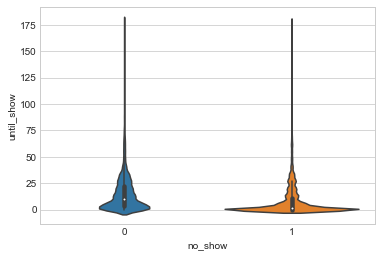

In [13]:
sns.violinplot(x='no_show', y='until_show', data=df3) # no_show : 0_YES, 1_NO

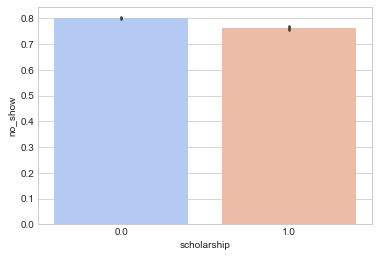

In [14]:
sns.barplot(x='scholarship', y='no_show', data=df3, palette='coolwarm') # no_show : 0_YES, 1_NO

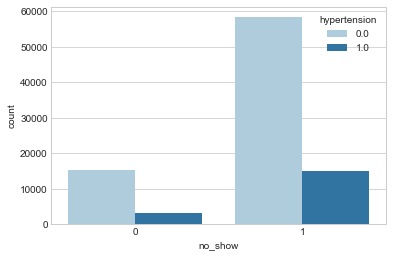

In [15]:
sns.countplot(x='no_show', hue='hypertension', data=df3, palette='Paired') # no_show : 0_YES, 1_NO

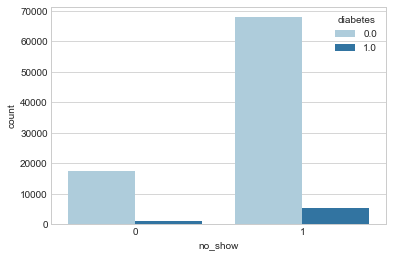

In [16]:
sns.countplot(x='no_show', hue='diabetes', data=df3, palette='Paired')# no_show : 0_YES, 1_NO

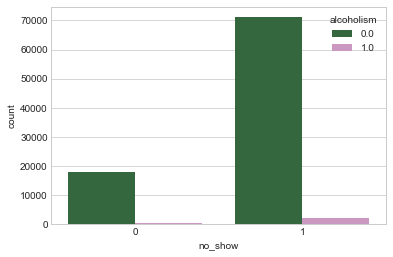

In [17]:
sns.countplot(x='no_show', hue='alcoholism', data=df3, palette='cubehelix')# no_show : 0_YES, 1_NO

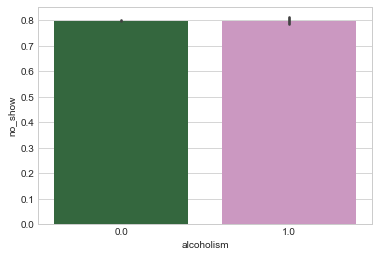

In [18]:
sns.barplot(x='alcoholism', y='no_show', data=df3, palette='cubehelix')# no_show : 0_YES, 1_NO

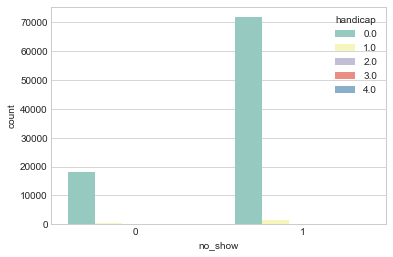

In [19]:
sns.countplot(x='no_show', hue='handicap', data=df3, palette='Set3')# no_show : 0_YES, 1_NO

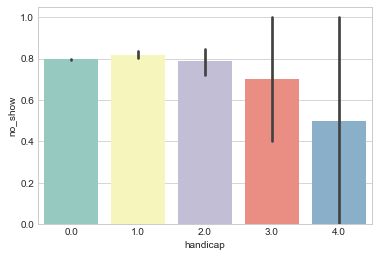

In [20]:
sns.barplot(x='handicap', y='no_show', data=df3, palette='Set3')# no_show : 0_YES, 1_NO

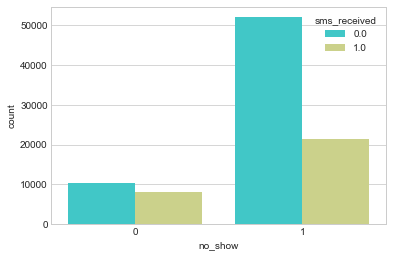

In [21]:
sns.countplot(x='no_show', hue='sms_received', data=df3, palette='rainbow')# no_show : 0_YES, 1_NO

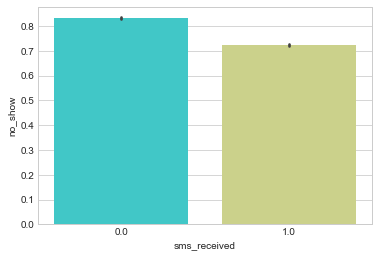

In [22]:
sns.barplot(x='sms_received', y='no_show', data=df3, palette='rainbow')# no_show : 0_YES, 1_NO

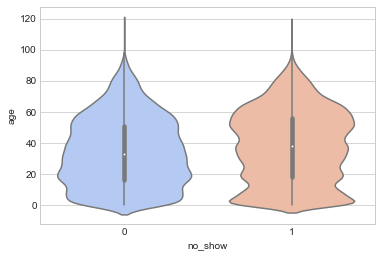

In [23]:
sns.violinplot(x='no_show', y='age', data=df3, palette='coolwarm')# no_show : 0_YES, 1_NO

# Predicting Show or no-show

### dividing data into two groups: train & test

In [24]:
x = df3[df3.columns[:-1]]
y = pd.DataFrame(df3[df3.columns[-1]]) #no-show

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

### #1 Using Logistic Regression to predict no-show

In [25]:
lr = LogisticRegression(C=1e10,class_weight='balanced')
lr.fit(x_train, np.ravel(y_train))

LogisticRegression(C=10000000000.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [26]:
lr.score(x_test, y_test)

0.6685411602510613

In [27]:
predictions = lr.predict(x_test)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[ 3027  2498]
 [ 6638 15400]]
             precision    recall  f1-score   support

          0       0.31      0.55      0.40      5525
          1       0.86      0.70      0.77     22038

avg / total       0.75      0.67      0.70     27563



### #2 Using RF

In [28]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(x_train, np.ravel(y_train))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [29]:
rfc.score(x_test, y_test)

0.7781446141566593

In [30]:
predictions = rfc.predict(x_test)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[ 1042  4483]
 [ 1632 20406]]
             precision    recall  f1-score   support

          0       0.39      0.19      0.25      5525
          1       0.82      0.93      0.87     22038

avg / total       0.73      0.78      0.75     27563



### #3 Using Naive bayes Classifier

In [31]:
nbc = MultinomialNB()
nbc.fit(x_train, np.ravel(y_train))

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [32]:
nbc.score(x_test, y_test)

0.7099372346986903

In [33]:
predictions = nbc.predict(x_test)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[ 2420  3105]
 [ 4890 17148]]
             precision    recall  f1-score   support

          0       0.33      0.44      0.38      5525
          1       0.85      0.78      0.81     22038

avg / total       0.74      0.71      0.72     27563



### #4 Using gradient boosting classifier

In [34]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train, np.ravel(y_train))

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [35]:
gbc.score(x_test, y_test)

0.7994775604977687

In [36]:
predictions = gbc.predict(x_test)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[   28  5497]
 [   30 22008]]
             precision    recall  f1-score   support

          0       0.48      0.01      0.01      5525
          1       0.80      1.00      0.89     22038

avg / total       0.74      0.80      0.71     27563



# Conclusion

#### According to accuracy scores, the gradient boosting classifier seems to perform better than the other. 
#### But, after printing the confusion matrix, we can see that the gradient boosting classifier relatively fails to classify the no-show class labels. It detected only 28 out of 5525.

#### Although all the classifier used cannot predict no-show label properly, random forest classifier with 200 estimators looks more promising than the other. accuracy - Random Forest: 77%, Naive bayes: 70%, Logistic regression: 66%. 
#### (The accuracy of the random forest classifier doesn't increase much on increasing the number estimators.)